#### Instantiate llama2 llm with langchain Ollama

In [1]:
from langchain_community.llms import Ollama

llm = Ollama(model="llama2", temperature=0.01)

In [2]:
print(llm.invoke('Tell me a joke'))


Sure, here's one:

Why don't scientists trust atoms?
Because they make up everything!

I hope that brought a smile to your face!


#### Define Class to use the invoke method to assess whether statement is relevant to a question

###### Old prompts

In [ ]:
def _generate_prompt0(self, question: str, statement: str) -> str:
        return f'''
            The statement below is from a reddit thread for employees of the company for which a question is asked. 
            Does the statement provide information relevant to the question listed below (delimeted by ```)? 
            Please format the output as a dictionary with the following keys: "relevant", "reason". 
            Relevant should be a boolean value indicating whether the statement is relevant to the question.
            Reason should be a string explaining why and how the statement is or is not relevant.
            Two examples and accompanying outputs are provided here (delimited by ~~~):
            ~~~
            Example 1:
            Question: "What team has won the most Super Bowls?"
            Statement: "The New England Patriots have won the Super Bowl a record six times"
            Output: {{
                "relevant": true,
                "reason": "The statement provides about the team that has won the most Super Bowls"
            }}
            ~~~
            Example 2:
            Question: "What team has won the most Super Bowls?"
            Statement: "I do not find that interesting"
            Output: {{
                "relevant": false,
                "reason": "The statement provided does not have the needed context to help answer the question"
            }}
            ~~~
            ```
            Question: {question}
            ```
            Statement:{statement}
            ```
            '''.replace('            ','')

def prompt_template(question: str, statement: str) -> str:
    return f'''
        Your role is to label chunks of texts to determine whether they are relevant to a given question.
        The statement provided is taken from employees of the company for which a question is asked. 
        A statement should be labeled as relevant (true) if it provides information that helps answer the question.
        It does not need to answer the question directly, but it should provide at least something relevant to the question.
        For example, if the question is "What do employees have to say about promotions?", a statement like 
        "I have never gotten a raise" would be labeled as relevant.
        Does the statement provide information relevant to the question listed below (delimeted by ```)? 
        Please format the output as a dictionary with the following keys: "relevant", "reason". 
        Relevant should be a boolean value indicating whether the statement is relevant to the question.
        Reason should be a string explaining why and how the statement is or is not relevant.
        An examples and accompanying output is provided here (delimited by ~~~):
        ~~~
        Example:
        Question: "What team has won the most Super Bowls?"
        Statement: "I do not find that interesting"
        Output: {{
            "relevant": false,
            "reason": "The statement provided does not have the needed context to help answer the question"
        }}
        ~~~
        ```
        Question: {question}
        ```
        Statement:{statement}
        ```
        '''.replace('        ','')

def _generate_prompt(self, question: str, statement: str) -> str:
        return f'''
            Your role is to label chunks of text (statements) to determine whether they are relevant to a given question for a retrieval system.
            The statement provided is taken from employees of the company for which a question is asked. 
            A statement should be labeled as relevant (true) if it provides information that helps answer the question.
            It does not need to answer the question directly, but it should provide at least something relevant to the question.
            For example, if the question is "What do employees have to say about promotions?", a statement like 
            "I have never gotten a raise" would be labeled as relevant.
            Does the statement provide information relevant to the question listed below (delimeted by ```)? 
            Please format the output as a dictionary with the following keys: "relevant", "reason". 
            Relevant should be a boolean value indicating whether the statement is relevant to the question.
            Reason should be a string explaining why and how the statement is or is not relevant.
            An examples and accompanying output is provided here (delimited by ~~~):
            ~~~
            Example:
            Question: "What team has won the most Super Bowls?"
            Statement: "I do not find that interesting"
            Output: {{
                "relevant": false,
                "reason": "The statement provided does not have the needed context to help answer the question"
            }}
            ~~~
            ```
            Question: {question}
            ```
            Statement:{statement}
            ```
        '''.replace('            ','')


    def _generate_prompt(self, question: str, statement: str) -> str:
        return f'''
            Your role is to label chunks of text (statements) to determine whether they are relevant to a given question for a retrieval system.
            The statement and question are listed below (delimeted by ```).
            The statement provided is taken from employees of the company for which a question is asked. 
            A statement should be labeled as relevant (true) if it provides information that helps answer the question.
            It does not need to answer the question directly, but it should provide at least something relevant to the question.
            For example, if the question is "What do employees have to say about promotions?", a statement like 
            "I have never gotten a raise" would be labeled as relevant.
            Please format the output as a dictionary with the following keys: "relevant", "reason". 
            Relevant should be a boolean value indicating whether the statement is relevant to the question.
            Reason should be a string explaining why and how the statement is or is not relevant.
            An example and accompanying output is provided here (delimited by ~~~):
            ~~~
            Example:
            Question: "What team has won the most Super Bowls?"
            Statement: "I do not find that interesting"
            Output: {{
                "relevant": false,
                "reason": "The statement provided does not have the needed context to help answer the question"
            }}
            ~~~
            ```
            Question: {question}
            ```
            Statement:{statement}
            ```
        '''.replace('            ','')

def _generate_prompt(self, question: str, statement: str) -> str:
        return f'''
            <s>[INST] <<SYS>>
            Your role is to label chunks of text (statements) to determine whether they are relevant to a given question for a retrieval system.
            The statement and question are listed below (delimeted by ```).
            The statement provided is taken from employees of the company for which a question is asked. 
            A statement should be labeled as relevant (true) if it provides information that helps answer the question.
            It does not need to answer the question directly, but it should provide at least something relevant to the question.
            A rewording of the question without adding any personal perspective should be considered unrelevant (false).
            For example, if the question is "What do employees have to say about promotions?", a statement like 
            "I have never gotten a raise" would be labeled as relevant.
            Please format the output as a dictionary with the following keys: "relevant", "reason". 
            Relevant should be a boolean value indicating whether the statement is relevant to the question.
            Reason should be a string explaining why and how the statement is or is not relevant.
            An example and accompanying output is provided here (delimited by ~~~):
            ~~~
            Example:
            Question: "What team has won the most Super Bowls?"
            Statement: "I do not find that interesting"
            Output: {{
                "relevant": false,
                "reason": "The statement provided does not have the needed context to help answer the question"
            }}
            ~~~
            <</SYS>>
            ```
            Question: {question}
            ```
            Statement:{statement}
            ```
            [/INST]
        '''.replace('            ','')

##### Class Definition

In [47]:
import json
from langchain_community.llms import Ollama



class Evaluator:

    def __init__(self, llm: Ollama):
        self.llm = llm
        
    def _generate_prompt(self, question: str, statement: str) -> str:
        return f'''
            <s>[INST] <<SYS>>
            Your role is to label chunks of text (statements) to determine whether they are relevant to a given question for a retrieval system.
            The statement and question are listed below (delimeted by ```).
            The statement provided is taken from employees of the company for which a question is asked. 
            A statement should be labeled as relevant (true) if it provides information that helps answer the question.
            It does not need to answer the question directly, but it should provide at least something relevant to the question.
            A restatement of the question without adding any personal perspective should be considered irrelevant (false).
            For example, if the question is "What do employees have to say about promotions?", a statement like 
            "I have never gotten a raise" would be labeled as relevant (true); whereas, a statement like "Do employees promotions." 
            would be labeled as irrelevant (false).

            Please format the output as a dictionary with the following keys: "relevant", "reason". 
            Relevant should be a boolean value indicating whether the statement is relevant to the question.
            Reason should be a string explaining why and how the statement is or is not relevant.
            An example and accompanying output is provided here (delimited by ~~~):
            ~~~
            Example:
            Question: "What team has won the most Super Bowls?"
            Statement: "I do not find that interesting"
            Output: {{
                "relevant": false,
                "reason": "The statement provided does not have the needed context to help answer the question"
            }}
            ~~~
            <</SYS>>
            ```
            Question: {question}
            ```
            Statement:{statement}
            ```
            [/INST]
        '''.replace('            ','')
    
    def _format_output(self, output: str) -> dict:
        out_dict = {"output": output}
        output = output.replace('\n', '').replace('```','').strip()
        output = output[output.index('{'):output.rindex('}')+1]
        return json.loads(output) | out_dict

    def _invoke_llm(self, query: str) -> str:
        return self.llm.invoke(query)

    def evaluate_one(self, question, statement) -> dict:
        query = self._generate_prompt(question, statement).replace('\n', '')
        output = self._invoke_llm(query)
        try:
            return self._format_output(output)
        except:
            return {"relevant": None, "reason": "Error parsing output", "output": output}

## Example Prompt

In [20]:
evaluator = Evaluator(llm)
question = 'What do Best Buy employees think of the company?'
statement = 'I hate working here. The pay is terrible and the hours are long.'
print(evaluator._generate_prompt(question, statement))


<s>[INST] <<SYS>>
Your role is to label chunks of text (statements) to determine whether they are relevant to a given question for a retrieval system.
The statement and question are listed below (delimeted by ```).
The statement provided is taken from employees of the company for which a question is asked. 
A statement should be labeled as relevant (true) if it provides information that helps answer the question.
It does not need to answer the question directly, but it should provide at least something relevant to the question.
For example, if the question is "What do employees have to say about promotions?", a statement like 
"I have never gotten a raise" would be labeled as relevant.
Please format the output as a dictionary with the following keys: "relevant", "reason". 
Relevant should be a boolean value indicating whether the statement is relevant to the question.
Reason should be a string explaining why and how the statement is or is not relevant.
An example and accompanying outp

In [40]:
question = samples_df.iloc[0]['question']
statement = samples_df.iloc[0]['statement']
print(question, statement)

What do Best Buy employees think fo the company? What is your opinion on Best Buy currently.


In [48]:
evaluator = Evaluator(llm)
out = evaluator.evaluate_one(question, statement)
print(f'question: {question}')
print(f'statement: {statement}')
print(out)

question: What do Best Buy employees think fo the company?
statement: What is your opinion on Best Buy currently.
{'relevant': True, 'reason': 'The statement provides a personal perspective on Best Buy, which can help answer the question about what employees think of the company.', 'output': '\n{\n"relevant": true,\n"reason": "The statement provides a personal perspective on Best Buy, which can help answer the question about what employees think of the company."\n}'}


#### Test on two cases

In [19]:
evaluator = Evaluator(llm)
question = 'What do Best Buy employees think of the company?'

context1 = 'I hate working here. The pay is terrible and the hours are long.'
out1 = evaluator.evaluate_one(question, context1)

context2 = 'Why did you do that?'
out2 = evaluator.evaluate_one(question, context2)
print(f'Question: {question}\n')
print(f'Text 1: {context1}\nOutput: {out1}')
print(f'\nText 2: {context2}\nOutput: {out2}')

Question: What do Best Buy employees think of the company?

Text 1: I hate working here. The pay is terrible and the hours are long.
Output: {'relevant': True, 'reason': 'The statement provides some negative information about the company, which could be relevant to an inquiry into employee satisfaction or work environment.', 'output': '\n{\n"relevant": true,\n"reason": "The statement provides some negative information about the company, which could be relevant to an inquiry into employee satisfaction or work environment."\n}'}

Text 2: Why did you do that?
Output: {'relevant': False, 'reason': 'The statement provided does not relate to Best Buy or its employees, and therefore is not relevant to the question.', 'output': '\n{\n"relevant": false,\n"reason": "The statement provided does not relate to Best Buy or its employees, and therefore is not relevant to the question."\n}'}


In [25]:
import pandas as pd
pd.DataFrame([out1, out2])[['relevant','reason']]

,relevant,reason
0,True,The statement provides some negative informati...
1,False,The statement provided does not relate to Best...


#### Test reproducibility
1. With low temperature, we expect near identical outputs
2. With high temperature variance in the output is expected

In [17]:
evaluator = Evaluator(llm)
question = 'What do Best Buy employees think of the company?'
statement = 'I hate working here. The pay is terrible and the hours are long.'

outputs = []
for i in range(3):
    out = evaluator.evaluate_one(question, statement)
    outputs.append(out)
    print(out)

{'relevant': True, 'reason': 'The statement provides some negative information about the company, which could be relevant to an inquiry regarding employee opinions of Best Buy.', 'output': '\n{\n"relevant": true,\n"reason": "The statement provides some negative information about the company, which could be relevant to an inquiry regarding employee opinions of Best Buy."\n}'}
{'relevant': True, 'reason': 'The statement provides some negative information about the company, which could be relevant to an inquiry regarding employee opinions of Best Buy.', 'output': '\n{\n"relevant": true,\n"reason": "The statement provides some negative information about the company, which could be relevant to an inquiry regarding employee opinions of Best Buy."\n}'}
{'relevant': True, 'reason': 'The statement provides some negative information about the company, which could be relevant to an inquiry regarding employee opinions of Best Buy.', 'output': '\n{\n"relevant": true,\n"reason": "The statement provi

#### Running on samples of chunks

In [28]:
samples_df = pd.read_csv('../../data/best_buy/sample_questions_statements.csv')

In [29]:
samples_df

,question,statement
0,What do Best Buy employees think fo the company?,What is your opinion on Best Buy currently.
1,What do Best Buy employees think fo the company?,Why are you at Best Buy?
2,What do Best Buy employees think fo the company?,"Don’t listen to this guy, I work there and the..."
3,What do Best Buy employees think fo the company?,"Being a veteran and Best Buy employee, I can s..."
4,What do Best Buy employees think fo the company?,Life as a Best Buy worker 💀
...,...,...
114,Do employees feel understaffed?,Still insane to me they don’t do an annual 75%...
115,Do employees feel understaffed?,Hope you all can help - being denied refund; H...
116,Do employees feel understaffed?,New hire that still needs to receive paperwork...
117,Do employees feel understaffed?,Love this!!! My team was the same although si...


In [39]:
samples_df.iloc[0]

question     What do Best Buy employees think fo the company?
statement         What is your opinion on Best Buy currently.
Name: 0, dtype: object

In [38]:
evaluator = Evaluator(llm)
sample_data = []
for i, row in samples_df.iterrows():
    question = row['question']
    statement = row['statement']
    out = evaluator.evaluate_one(question, statement)
    sample_data.append((out | row.to_dict()))
    print(f'\nQuestion: {question}')
    print(f'Statement: {statement}')
    print(f'Output: {out}')
    pd.DataFrame(sample_data).to_csv('../../data/best_buy/labelled_samples.csv', index=False)


Question: What do Best Buy employees think fo the company?
Statement: What is your opinion on Best Buy currently.
Output: {'relevant': True, 'reason': 'The statement provides some insight into the opinions of Best Buy employees, which can help answer the question about the company.', 'output': '\n{\n"relevant": true,\n"reason": "The statement provides some insight into the opinions of Best Buy employees, which can help answer the question about the company."\n}'}

Question: What do Best Buy employees think fo the company?
Statement: Why are you at Best Buy?
Output: {'relevant': True, 'reason': "The statement provides some information about the speaker's relationship with Best Buy, which could potentially be relevant to the question asked.", 'output': '\n{\n"relevant": true,\n"reason": "The statement provides some information about the speaker\'s relationship with Best Buy, which could potentially be relevant to the question asked."\n}'}

Question: What do Best Buy employees think fo t

#### Evaluate

In [88]:
import pandas as pd
published_urls = {
    'peter': 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSpSp39dL7fapMm2wZD_AQriiXFB81j1M7UyZJPuGtsE1p0fpiWKX-cyYDy10SceVJol1kc-CrCe-ZZ/pub?gid=1213933157&single=true&output=csv',
    'craig': 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRdU37NHc1rufQXqgFj8x3yVFLNHwsLuDXHN_-LHduZWQEc4uq0T7q8mleVBVclZPmdcV36EdX9xIIY/pub?output=csv',
    'anil': 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQSq5DnR6MoQ-W6L0fuliZfeql5SRrjeCtgf0cOwZRnltTM7NMiYv-8Lxsj169iqNSs-p5lXzt_1tW1/pub?output=csv',
    'himanshu': 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQnpgHyoYuuzdD-CVcFWosqJ7EGUITAhE7XW-X1-mzAfsbhqg_nItuP9vt9OOUq1ACXhFaZfzsiaagP/pub?output=csv',
    'mohammad': 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSLne6nuIwlLUy_c9pMRuE27dnD68YKY6wftO-0CYN_7WnP7iqUX2VWY5qC4fuSyNK9JVDZOTp16WhD/pub?output=csv',
}
labellers = list(published_urls.keys()) + ['observer']
labelled_sample_dfs = [pd.read_csv(url) for url in published_urls.values()] 
df = labelled_sample_dfs[0]
for i in range(1, len(labelled_sample_dfs)):
    df = df.merge(labelled_sample_dfs[i], how='outer', on=['question', 'statement'])
df.rename(columns = {name: name.lower() for name in df.columns}, inplace=True)
df['average_label'] = df[labellers].mean(axis=1)
df['label_sum'] = df[labellers].sum(axis=1)
df['consensus'] = (df['label_sum']>=2).astype(int)
df

,question,statement,peter,craig,anil,himanshu,observer,mohammad,average_label,label_sum,consensus
0,What do Best Buy employees think fo the company?,What is your opinion on Best Buy currently.,0,0,0,1,0,0.0,0.166667,1.0,0
1,What do Best Buy employees think fo the company?,Why are you at Best Buy?,0,0,0,1,0,0.0,0.166667,1.0,0
2,What do Best Buy employees think fo the company?,"Don’t listen to this guy, I work there and the...",1,1,1,1,1,1.0,1.000000,6.0,1
3,What do Best Buy employees think fo the company?,"Being a veteran and Best Buy employee, I can s...",1,0,0,1,1,0.0,0.500000,3.0,1
4,What do Best Buy employees think fo the company?,Life as a Best Buy worker 💀,1,0,0,1,1,1.0,0.666667,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...
114,Do employees feel understaffed?,Still insane to me they don’t do an annual 75%...,0,0,0,0,0,0.0,0.000000,0.0,0
115,Do employees feel understaffed?,Hope you all can help - being denied refund; H...,0,0,0,0,0,0.0,0.000000,0.0,0
116,Do employees feel understaffed?,New hire that still needs to receive paperwork...,0,0,0,0,0,0.0,0.000000,0.0,0
117,Do employees feel understaffed?,Love this!!! My team was the same although si...,1,0,0,0,0,0.0,0.166667,1.0,0


In [89]:
llm_labelled = pd.read_csv('../../data/best_buy/labelled_samples.csv')
llm_labelled

,relevant,reason,output,question,statement
0,True,The statement provides some insight into the o...,"\n{\n""relevant"": true,\n""reason"": ""The stateme...",What do Best Buy employees think fo the company?,What is your opinion on Best Buy currently.
1,True,The statement provides some information about ...,"\n{\n""relevant"": true,\n""reason"": ""The stateme...",What do Best Buy employees think fo the company?,Why are you at Best Buy?
2,True,The statement provides information about the w...,"\n{\n""relevant"": true,\n""reason"": ""The stateme...",What do Best Buy employees think fo the company?,"Don’t listen to this guy, I work there and the..."
3,True,The statement provides some insight into the p...,"\n{\n""relevant"": true,\n""reason"": ""The stateme...",What do Best Buy employees think fo the company?,"Being a veteran and Best Buy employee, I can s..."
4,True,The statement provides some insight into the w...,"\n{\n""relevant"": true,\n""reason"": ""The stateme...",What do Best Buy employees think fo the company?,Life as a Best Buy worker 💀
...,...,...,...,...,...
114,True,The statement provides some insight into emplo...,\nHere's the output for the given question and...,Do employees feel understaffed?,Still insane to me they don’t do an annual 75%...
115,True,The statement provides some information that c...,\nHere's the output for the given question and...,Do employees feel understaffed?,Hope you all can help - being denied refund; H...
116,True,The statement provides some context related to...,\nHere is the output for the given question an...,Do employees feel understaffed?,New hire that still needs to receive paperwork...
117,True,The statement provides information about the c...,"\n{\n""relevant"": true,\n""reason"": ""The stateme...",Do employees feel understaffed?,Love this!!! My team was the same although si...


In [90]:
df_all = df.merge(llm_labelled, how='outer', on=['question', 'statement'])
df_all = df_all.dropna(subset=['relevant'])
df_all

,question,statement,peter,craig,anil,himanshu,observer,mohammad,average_label,label_sum,consensus,relevant,reason,output
0,What do Best Buy employees think fo the company?,What is your opinion on Best Buy currently.,0,0,0,1,0,0.0,0.166667,1.0,0,True,The statement provides some insight into the o...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."
1,What do Best Buy employees think fo the company?,Why are you at Best Buy?,0,0,0,1,0,0.0,0.166667,1.0,0,True,The statement provides some information about ...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."
2,What do Best Buy employees think fo the company?,"Don’t listen to this guy, I work there and the...",1,1,1,1,1,1.0,1.000000,6.0,1,True,The statement provides information about the w...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."
3,What do Best Buy employees think fo the company?,"Being a veteran and Best Buy employee, I can s...",1,0,0,1,1,0.0,0.500000,3.0,1,True,The statement provides some insight into the p...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."
4,What do Best Buy employees think fo the company?,Life as a Best Buy worker 💀,1,0,0,1,1,1.0,0.666667,4.0,1,True,The statement provides some insight into the w...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Do employees feel understaffed?,Still insane to me they don’t do an annual 75%...,0,0,0,0,0,0.0,0.000000,0.0,0,True,The statement provides some insight into emplo...,\nHere's the output for the given question and...
115,Do employees feel understaffed?,Hope you all can help - being denied refund; H...,0,0,0,0,0,0.0,0.000000,0.0,0,True,The statement provides some information that c...,\nHere's the output for the given question and...
116,Do employees feel understaffed?,New hire that still needs to receive paperwork...,0,0,0,0,0,0.0,0.000000,0.0,0,True,The statement provides some context related to...,\nHere is the output for the given question an...
117,Do employees feel understaffed?,Love this!!! My team was the same although si...,1,0,0,0,0,0.0,0.166667,1.0,0,True,The statement provides information about the c...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."


In [97]:
questions = df_all.question.unique()
question = questions[1]
df_all[df_all.question==question].sort_values('label_sum', ascending=False).reset_index(drop=True)

,question,statement,peter,craig,anil,himanshu,observer,mohammad,average_label,label_sum,consensus,relevant,reason,output
0,What are the most common reasons for employees...,Best Buy is running out of good reasons for pe...,1,1,1,1,1,1.0,1.000000,6.0,1,True,The statement provides information about the r...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."
1,What are the most common reasons for employees...,"i've been here for 8 years, work in the highes...",1,1,1,1,1,1.0,1.000000,6.0,1,True,The statement provides information about the r...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."
2,What are the most common reasons for employees...,Let Go Today; I was informed today that I was ...,1,1,1,1,1,1.0,1.000000,6.0,1,True,The statement provides information that helps ...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."
3,What are the most common reasons for employees...,Best Buy doesn’t want salesmen anymore. Old sc...,0,1,1,1,1,1.0,0.833333,5.0,1,True,The statement provides information about the c...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."
4,What are the most common reasons for employees...,Former employee here. Please unionize if possi...,1,0,0,1,1,1.0,0.666667,4.0,1,True,The statement provides information about the r...,\nHere is the output for the given question an...
5,What are the most common reasons for employees...,When you are told to sell it no matter what or...,1,0,0,1,1,0.0,0.500000,3.0,1,True,The statement provides information about a com...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."
6,What are the most common reasons for employees...,I mean you really aren’t allowed to record in ...,1,0,0,1,0,0.0,0.333333,2.0,1,True,The statement provides some insight into the w...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."
7,What are the most common reasons for employees...,This is a department of labor issue Turn them in,1,0,0,1,0,0.0,0.333333,2.0,1,True,The statement provides information about a com...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."
8,What are the most common reasons for employees...,12 hr shift here too. Normal pay man,0,0,0,1,1,0.0,0.333333,2.0,1,True,The statement provides some information about ...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."
9,What are the most common reasons for employees...,Plus it’s clearly wasting the employees time. ...,0,0,0,1,1,0.0,0.333333,2.0,1,True,The statement provides some insight into the r...,"\n{\n""relevant"": true,\n""reason"": ""The stateme..."


In [98]:
df_all.to_csv('../../data/best_buy/labelled_samples_all.csv', index=False)

In [100]:
import numpy as np

temp_df = df_all[df_all.question==question].sort_values('label_sum', ascending=False).reset_index(drop=True)
idxs = np.append(np.arange(0,10), np.arange(len(temp_df) - 20, len(temp_df)))
len(idxs)

30

In [102]:
questions = df_all.question.unique()
resampled_df = pd.DataFrame()
for question in questions:
    temp_df = df_all[df_all.question==question].sort_values('label_sum', ascending=False).reset_index(drop=True)
    idxs = np.append(np.arange(0,10), np.arange(len(temp_df) - 20, len(temp_df)))
    resampled_df = pd.concat([resampled_df, temp_df.iloc[idxs,:]])
resampled_df.to_csv('../../data/best_buy/evaluation_set.csv', index=False)

1. How does consensus compare?

,consensus,llm_label
question,,
Do employees feel understaffed?,10,37
What are the most common reasons for employees to leave Best Buy?,13,37
What do Best Buy employees think fo the company?,13,38


['Do employees feel understaffed?', 'What are the most common \n reasons for employees to \n leave Best Buy?', 'What do Best Buy employees \n think fo the company?']


Text(0.5, 0, 'Question')

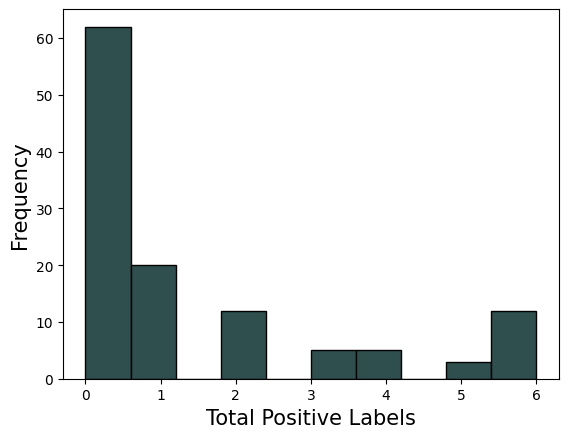

<Figure size 2000x500 with 0 Axes>

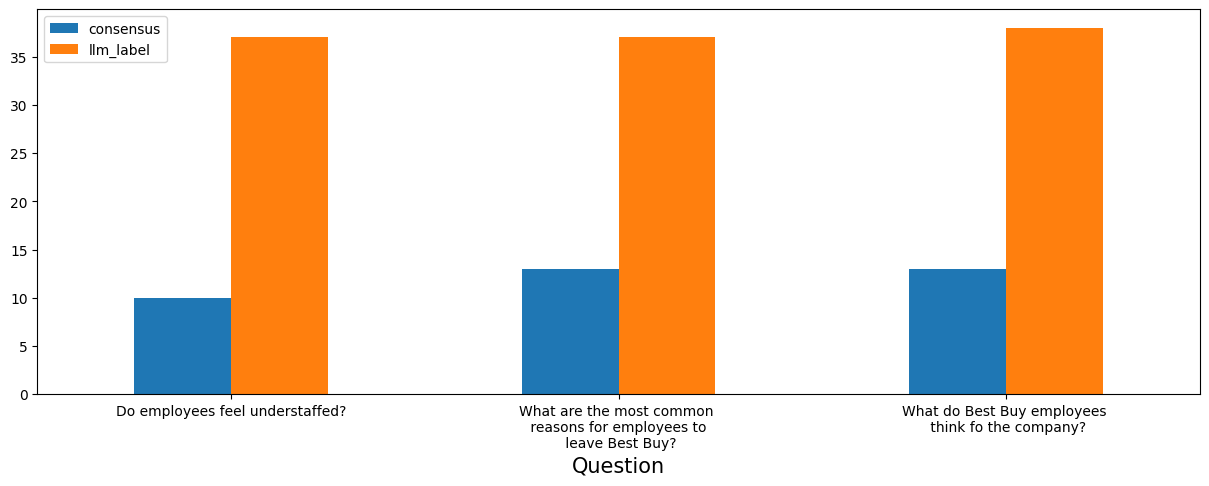

In [93]:
from matplotlib import pyplot as plt
plt.hist(df['label_sum'], color = 'darkslategray', edgecolor = 'black')
plt.xlabel('Total Positive Labels', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

display(df_all[['question', 'consensus', 'relevant']].rename(columns = {'relevant': 'llm_label'}).groupby('question').sum())

f = plt.figure(figsize=(20,5))
# Make bar plot of total of consensus vs LLM label for each question 
plot_df = df_all[['question', 'consensus', 'relevant']].rename(columns = {'relevant': 'llm_label'}).groupby('question').sum()
plot_df.plot(kind='bar', figsize=(15,5))
def wrap_text(text, n_words = 5):
    sent = text.split(' ')
    for i in range(n_words, len(sent), n_words):
        sent.insert(i, '\n')
    return ' '.join(sent)
question_labels = [wrap_text(q) for q in plot_df.index.to_list()]
print(question_labels)
# reassign xticks to be question_labels
plt.xticks(range(len(question_labels)), question_labels, rotation=0)
plt.xlabel('Question', fontsize=15)

In [84]:
question_labels

['Do employees feel understaffed?',
 'What are the most common \n reasons for employees to \n leave Best Buy?',
 'What do Best Buy employees \n think fo the company?']

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(df_all['consensus'].astype(int), df_all['relevant'].astype(int))
recall = recall_score(df_all['consensus'].astype(int), df_all['relevant'].astype(int))
print(precision, recall)

0.20535714285714285 1.0


In [50]:
agreements_df = df_all[df_all['consensus'].astype(int) == df_all['relevant'].astype(int)]
for i, row in agreements_df.iterrows():
    print(f'\nQuestion: {row["question"]}')
    print(f'Statement: {row["statement"]}')
    print(f'Consensus: {bool(row["consensus"])}, Llama Label: {row["relevant"]}')
    print(f'Reason: {row["reason"]}')
    print('-'*50)


Question: What do Best Buy employees think fo the company?
Statement: Don’t listen to this guy, I work there and the team environment is outstanding everyone stands around talking to each other and let’s the antisocial people ring up the customers. You’ll enjoy Best Buy as long as you aren’t antisocial and you actually enjoy technology
Consensus: True, Llama Label: True
Reason: The statement provides information about the work environment at Best Buy, which is relevant to the question of what employees think of the company.
--------------------------------------------------

Question: What do Best Buy employees think fo the company?
Statement: Being a veteran and Best Buy employee, I can see what you and OP mean. It really depends on the individual, but the blanket statement is accurate enough.
Consensus: True, Llama Label: True
Reason: The statement provides some insight into the perspective of Best Buy employees, which could help answer the question about their thoughts on the compa

In [51]:
disagreements_df = df_all[df_all['consensus'].astype(int) != df_all['relevant'].astype(int)]

In [52]:
for i, row in disagreements_df.iterrows():
    print(f'\nQuestion: {row["question"]}')
    print(f'Statement: {row["statement"]}')
    print(f'Consensus: {bool(row["consensus"])}, Llama Label: {row["relevant"]}')
    print(f'Reason: {row["reason"]}')
    print('-'*50)


Question: What do Best Buy employees think fo the company?
Statement: What is your opinion on Best Buy currently.
Consensus: False, Llama Label: True
Reason: The statement provides some insight into the opinions of Best Buy employees, which can help answer the question about the company.
--------------------------------------------------

Question: What do Best Buy employees think fo the company?
Statement: Why are you at Best Buy?
Consensus: False, Llama Label: True
Reason: The statement provides some information about the speaker's relationship with Best Buy, which could potentially be relevant to the question asked.
--------------------------------------------------

Question: What do Best Buy employees think fo the company?
Statement: This is for Best Buy employees. Wrong Reddit
Consensus: False, Llama Label: True
Reason: The statement provides some information about Best Buy employees' opinions of the company, which could be relevant to answering the question.
-------------------

#### Using ragas evaluate

In [ ]:
from datasets import Dataset 
from ragas.metrics import context_precision
from ragas import evaluate

data_samples = {
    'question': ['When was the first super bowl?', 'Who won the most super bowls?'],
    'answer': ['The first superbowl was held on Jan 15, 1967', 'The most super bowls have been won by The New England Patriots'],
    'contexts' : [['The First AFL–NFL World Championship Game was an American football game played on January 15, 1967, at the Los Angeles Memorial Coliseum in Los Angeles,'], 
    ['The Green Bay Packers...Green Bay, Wisconsin.','The Packers compete...Football Conference']],
    'ground_truth': ['The first superbowl was held on January 15, 1967', 'The New England Patriots have won the Super Bowl a record six times']
}
dataset = Dataset.from_dict(data_samples)

In [11]:
score = evaluate(dataset,metrics=[context_precision], llm=llm)
score.to_pandas()

Evaluating: 100%|██████████| 2/2 [03:03<00:00, 91.95s/it]


,question,answer,contexts,ground_truth,context_precision
0,When was the first super bowl?,"The first superbowl was held on Jan 15, 1967",[The First AFL–NFL World Championship Game was...,"The first superbowl was held on January 15, 1967",1.0
1,Who won the most super bowls?,The most super bowls have been won by The New ...,"[The Green Bay Packers...Green Bay, Wisconsin....",The New England Patriots have won the Super Bo...,0.0
